In [ ]:
import numpy as np
weights = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001

def ReLU(x):
  return np.maximum(0,x)

def ReLU_Derivation(x):
  return np.where(x>0, 1.0, 0.0)

for iterations in range(200):

  linear_ouput = np.dot(weights,inputs) + bias
  output = ReLU(linear_ouput)
  loss = (output - target_output) ** 2

  dLoss_dOutput = 2 * (output - target_output)
  dOutput_dLinear_output = ReLU_Derivation(linear_ouput)
  dLinear_mul_dWeights = inputs
  dLinear_dBias = 1.0

#page 69 in samsung notes NNFS

  dLoss_dLinear = dLoss_dOutput * dOutput_dLinear_output
  dLoss_dWeights = dLoss_dLinear * dLinear_mul_dWeights
  dLoss_dBias = dLoss_dLinear * dLinear_dBias

  weights -= learning_rate * dLoss_dWeights
  bias -= learning_rate * dLoss_dBias

  print(f"Iteration {iterations + 1}, Loss: {loss}")

print("Final weights:", weights)
print("Final bias:", bias)


Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872399999999985
Iteration 3, Loss: 31.870541159999995
Iteration 4, Loss: 29.98699217744401
Iteration 5, Loss: 28.21476093975706
Iteration 6, Loss: 26.54726856821742
Iteration 7, Loss: 24.978324995835766
Iteration 8, Loss: 23.502105988581878
Iteration 9, Loss: 22.113131524656684
Iteration 10, Loss: 20.80624545154949
Iteration 11, Loss: 19.576596345362915
Iteration 12, Loss: 18.419619501351963
Iteration 13, Loss: 17.331019988822064
Iteration 14, Loss: 16.306756707482677
Iteration 15, Loss: 15.343027386070442
Iteration 16, Loss: 14.43625446755368
Iteration 17, Loss: 13.583071828521268
Iteration 18, Loss: 12.780312283455652
Iteration 19, Loss: 12.024995827503426
Iteration 20, Loss: 11.314318574097976
Iteration 21, Loss: 10.645642346368787
Iteration 22, Loss: 10.016484883698395
Iteration 23, Loss: 9.424510627071816
Iteration 24, Loss: 8.867522049011871
Iteration 25, Loss: 8.34345149591527
Iteration 26, Loss: 7.850353512506679
Iteration 27, Loss:

Epoch 1, Loss: 0.23487969148936358
Epoch 2, Loss: 0.10550376657730619
Epoch 3, Loss: 0.10270032023855563
Epoch 4, Loss: 0.10173158953549956
Epoch 5, Loss: 0.10119348426132535
Epoch 6, Loss: 0.10084451801038236
Epoch 7, Loss: 0.1006124572165912
Epoch 8, Loss: 0.10045676191869943
Epoch 9, Loss: 0.1003511469248849
Epoch 10, Loss: 0.10027772958786192
Epoch 11, Loss: 0.10022618803403908
Epoch 12, Loss: 0.1001899478731736
Epoch 13, Loss: 0.10016440400684157
Epoch 14, Loss: 0.10014622488452184
Epoch 15, Loss: 0.10013320345531003
Epoch 16, Loss: 0.10012387349338189
Epoch 17, Loss: 0.10011718588652682
Epoch 18, Loss: 0.10011238995305226
Epoch 19, Loss: 0.1001089485274148
Epoch 20, Loss: 0.10010647720729167
Epoch 21, Loss: 0.10010470088781262
Epoch 22, Loss: 0.10010342266429029
Epoch 23, Loss: 0.10010250158412218
Epoch 24, Loss: 0.10010183672981417
Epoch 25, Loss: 0.10010135583151249
Epoch 26, Loss: 0.10010100712005267
Epoch 27, Loss: 0.10010075349831477
Epoch 28, Loss: 0.10010056837110153
Epoch

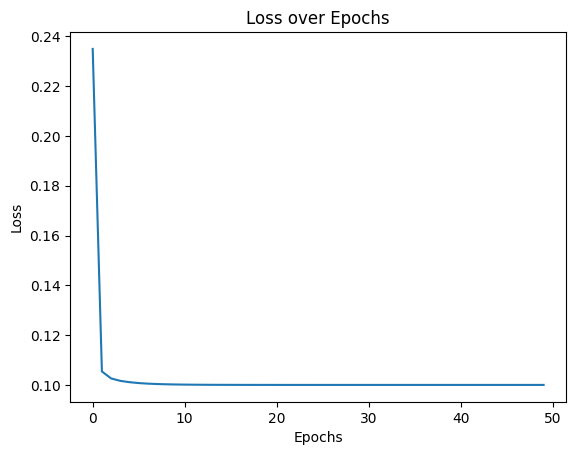

Test Accuracy: 91.50%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

# Binary classification: Digit '0' vs others
y_train = np.where(y_train == 0, 1, 0)
y_test = np.where(y_test == 0, 1, 0)

weights = np.random.randn(28*28)
bias = 0.0
learning_rate = 0.001

def ReLU(x):
    return np.maximum(0, x)

def ReLU_Derivation(x):
    return np.where(x > 0, 1.0, 0.0)

losses = []
for epoch in range(50):
    loss = 0
    for i in range(10000):  # Train on a subset for speed
        inputs = x_train[i]
        target = y_train[i]
        linear_output = np.dot(weights, inputs) + bias
        output = ReLU(linear_output)
        loss += (output - target) ** 2
        dLoss_dOutput = 2 * (output - target)
        dOutput_dLinear = ReLU_Derivation(linear_output)
        dLoss_dWeights = dLoss_dOutput * dOutput_dLinear * inputs
        dLoss_dBias = dLoss_dOutput * dOutput_dLinear
        weights -= learning_rate * dLoss_dWeights
        bias -= learning_rate * dLoss_dBias
    loss /= 10000
    losses.append(loss)
    print(f"Epoch {epoch + 1}, Loss: {loss}")

plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

correct = 0
for i in range(1000):
    inputs = x_test[i]
    target = y_test[i]
    output = ReLU(np.dot(weights, inputs) + bias)
    prediction = 1 if output >= 0.5 else 0
    if prediction == target:
        correct += 1
print(f"Test Accuracy: {correct / 1000 * 100:.2f}%")

# Output: Model accuracy and a plot showing training loss. A single neuron achieving around 85%-90% accuracy for distinguishing '0' from other digits is a significant output for such a simple model.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from google.colab import files

# Load the digits dataset from sklearn
digits = load_digits()

# Save 5 sample images from the dataset in Google Colab
def save_sample_images():
    for i in range(5):
        plt.imsave(f"sample_digit_{i}.png", digits.images[i], cmap='gray')
        files.download(f"sample_digit_{i}.png")

save_sample_images()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50 completed
Epoch 6/50 completed
Epoch 11/50 completed
Epoch 16/50 completed
Epoch 21/50 completed
Epoch 26/50 completed
Epoch 31/50 completed
Epoch 36/50 completed
Epoch 41/50 completed
Epoch 46/50 completed
Training Complete!


Saving sample_digit_4.png to sample_digit_4.png


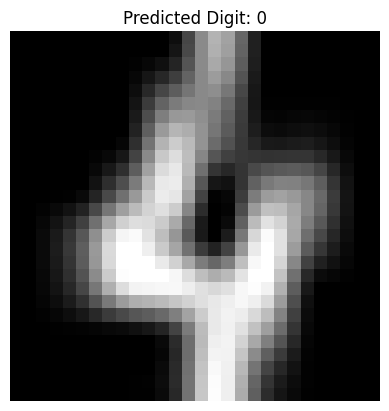

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
from google.colab import files

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

weights = np.random.randn(28*28, 10).astype(np.float64) * 0.01
bias = np.zeros(10).astype(np.float64)
learning_rate = 0.0005

def ReLU(x):
    return np.maximum(0, x)

def ReLU_Derivation(x):
    return (x > 0).astype(float)

y_train_one_hot = to_categorical(y_train, 10)

def train_model():
    global weights, bias
    for epoch in range(50):
        for i in range(len(x_train)):
            inputs = x_train[i]
            target = y_train_one_hot[i]

            linear_output = np.dot(inputs, weights) + bias
            output = ReLU(linear_output)

            error = output - target
            loss_gradient = 2 * error * ReLU_Derivation(linear_output)

            weights_gradient = np.outer(inputs, loss_gradient)
            bias_gradient = loss_gradient

            weights -= learning_rate * weights_gradient
            bias -= learning_rate * bias_gradient

        if epoch % 5 == 0:
            print(f"Epoch {epoch+1}/50 completed")
    print("Training Complete!")

def classify_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = Image.open(filename).convert('L').resize((28, 28))
        img_array = np.array(img).reshape(28*28) / 255.0
        output = ReLU(np.dot(img_array, weights) + bias)
        prediction = np.argmax(output)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted Digit: {prediction}")
        plt.axis('off')
        plt.show()

train_model()
classify_image()

Epoch 1/50 completed
Epoch 6/50 completed
Epoch 11/50 completed
Epoch 16/50 completed
Epoch 21/50 completed
Epoch 26/50 completed
Epoch 31/50 completed
Epoch 36/50 completed
Epoch 41/50 completed
Epoch 46/50 completed
Training Complete!


Saving sample_digit_4.png to sample_digit_4 (1).png


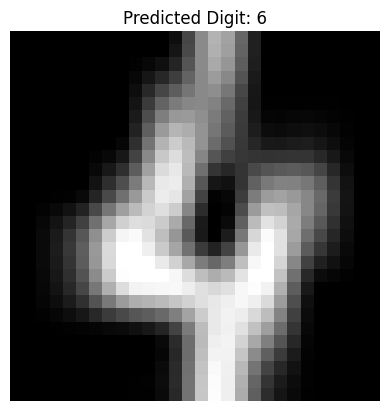

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from google.colab import files
from PIL import Image

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Neural Network Architecture
input_size = 784
hidden_size = 128
output_size = 10

# Initialize weights and biases
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
bias_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_output = np.zeros(output_size)
learning_rate = 0.001

# Activation Functions
def ReLU(x): return np.maximum(0, x)
def ReLU_Derivative(x): return (x > 0).astype(float)
def softmax(x): return np.exp(x) / np.sum(np.exp(x))

# Train the Neural Network
def train_ann():
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
    for epoch in range(50):
        for i in range(len(x_train)):
            inputs = x_train[i]
            target = y_train_one_hot[i]

            # Forward pass
            hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
            hidden_output = ReLU(hidden_input)
            final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
            final_output = softmax(final_input)

            # Backpropagation
            error = final_output - target
            d_output = error

            error_hidden = np.dot(d_output, weights_hidden_output.T) * ReLU_Derivative(hidden_input)

            # Gradient updates
            weights_hidden_output -= learning_rate * np.outer(hidden_output, d_output)
            bias_output -= learning_rate * d_output
            weights_input_hidden -= learning_rate * np.outer(inputs, error_hidden)
            bias_hidden -= learning_rate * error_hidden

        if epoch % 5 == 0:
            print(f"Epoch {epoch+1}/50 completed")
    print("Training Complete!")

def classify_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = Image.open(filename).convert('L').resize((28, 28))
        img_array = np.array(img).reshape(28*28) / 255.0
        hidden_output = ReLU(np.dot(img_array, weights_input_hidden) + bias_hidden)
        output = softmax(np.dot(hidden_output, weights_hidden_output) + bias_output)
        prediction = np.argmax(output)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted Digit: {prediction}")
        plt.axis('off')
        plt.show()

train_ann()
classify_image()
